# **SVM**

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Mhmd-sh3rawy/Spotify_dataset_NTI/refs/heads/main/data/procesed/modified-spotify-data.csv')

In [3]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (89740, 157)


In [4]:
print(f"Columns: {list(df.columns)}")

Columns: ['Unnamed: 0', 'track_genre_acoustic', 'track_genre_afrobeat', 'track_genre_alt-rock', 'track_genre_alternative', 'track_genre_ambient', 'track_genre_anime', 'track_genre_black-metal', 'track_genre_bluegrass', 'track_genre_blues', 'track_genre_brazil', 'track_genre_breakbeat', 'track_genre_british', 'track_genre_cantopop', 'track_genre_chicago-house', 'track_genre_children', 'track_genre_chill', 'track_genre_classical', 'track_genre_club', 'track_genre_comedy', 'track_genre_country', 'track_genre_dance', 'track_genre_dancehall', 'track_genre_death-metal', 'track_genre_deep-house', 'track_genre_detroit-techno', 'track_genre_disco', 'track_genre_disney', 'track_genre_drum-and-bass', 'track_genre_dub', 'track_genre_dubstep', 'track_genre_edm', 'track_genre_electro', 'track_genre_electronic', 'track_genre_emo', 'track_genre_folk', 'track_genre_forro', 'track_genre_french', 'track_genre_funk', 'track_genre_garage', 'track_genre_german', 'track_genre_gospel', 'track_genre_goth', 'tr

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Columns: 157 entries, Unnamed: 0 to temp_zscore
dtypes: float64(156), int64(1)
memory usage: 107.5 MB
None


In [6]:
print(df.head())

   Unnamed: 0  track_genre_acoustic  track_genre_afrobeat  \
0           0                   0.0                   0.0   
1           1                   0.0                   0.0   
2           2                   0.0                   0.0   
3           3                   0.0                   0.0   
4           4                   0.0                   0.0   

   track_genre_alt-rock  track_genre_alternative  track_genre_ambient  \
0                   0.0                      0.0                  0.0   
1                   0.0                      0.0                  0.0   
2                   0.0                      0.0                  0.0   
3                   0.0                      0.0                  0.0   
4                   0.0                      0.0                  0.0   

   track_genre_anime  track_genre_black-metal  track_genre_bluegrass  \
0                0.0                      0.0                    0.0   
1                0.0                      0.0     

In [7]:
print(df.describe())

         Unnamed: 0  track_genre_acoustic  track_genre_afrobeat  \
count  89740.000000          89740.000000          89740.000000   
mean   44869.500000              0.009984              0.010831   
std    25905.850916              0.099422              0.103509   
min        0.000000              0.000000              0.000000   
25%    22434.750000              0.000000              0.000000   
50%    44869.500000              0.000000              0.000000   
75%    67304.250000              0.000000              0.000000   
max    89739.000000              1.000000              1.000000   

       track_genre_alt-rock  track_genre_alternative  track_genre_ambient  \
count          89740.000000             89740.000000         89740.000000   
mean               0.005527                 0.004702             0.009550   
std                0.074139                 0.068414             0.097256   
min                0.000000                 0.000000             0.000000   
25%        

In [8]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [9]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Duplicate rows: 0


In [10]:
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

In [11]:
print("\nHandling missing values...")
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            # For categorical columns, fill with mode
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            # For numerical columns, fill with median
            df[column] = df[column].fillna(df[column].median())

print("Missing values after handling:")
print(df.isnull().sum().sum())


Handling missing values...
Missing values after handling:
0


In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {list(categorical_columns)}")


Categorical columns: []


In [13]:
# Drop the 'Unnamed: 0' column as it appears to be an index column
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("Dropped 'Unnamed: 0' column")

Dropped 'Unnamed: 0' column


In [14]:
label_encoders = {}
for column in categorical_columns:
    if column != 'target':  # Assuming 'target' is our target variable
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le

Text(0.5, 0.98, 'Spotify Dataset Analysis')

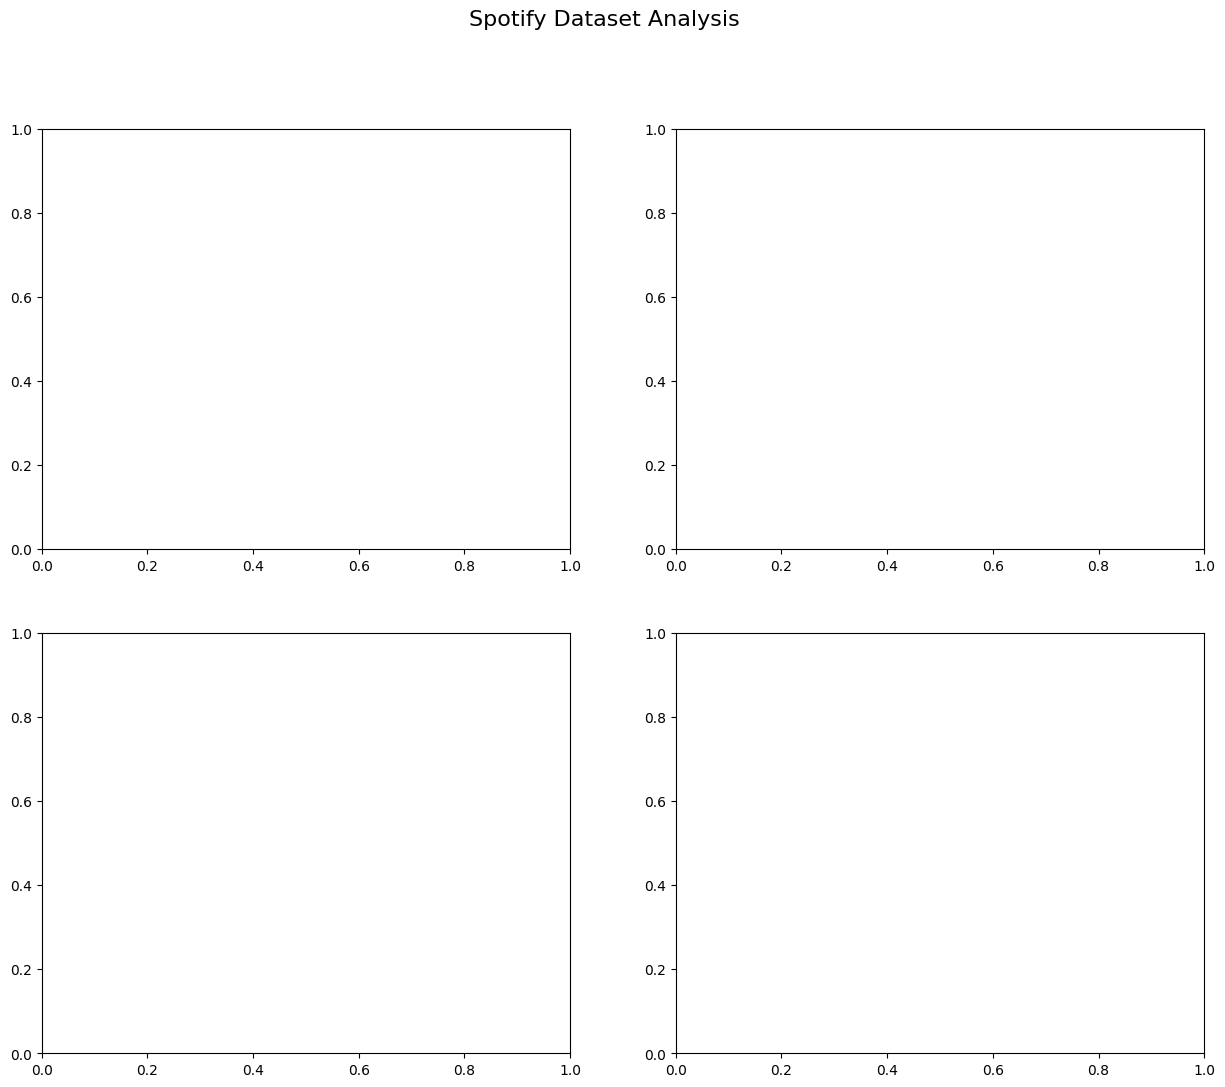

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Spotify Dataset Analysis', fontsize=16)

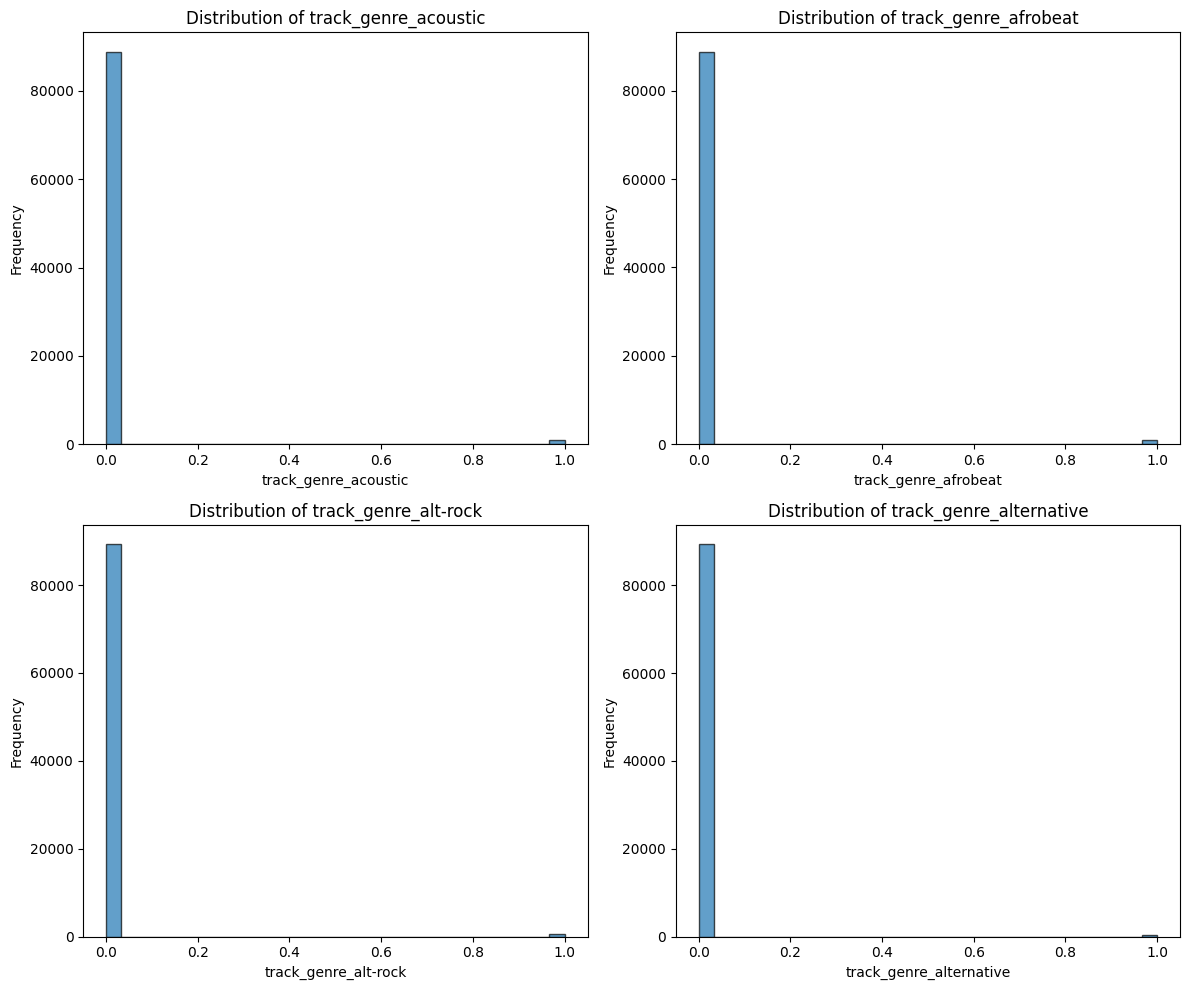

In [16]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) # Create a 2x2 grid for the first 4 plots

for i, col in enumerate(numerical_columns[:4]):
    row = i // 2
    col_idx = i % 2
    axes[row, col_idx].hist(df[col], bins=30, alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('data_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

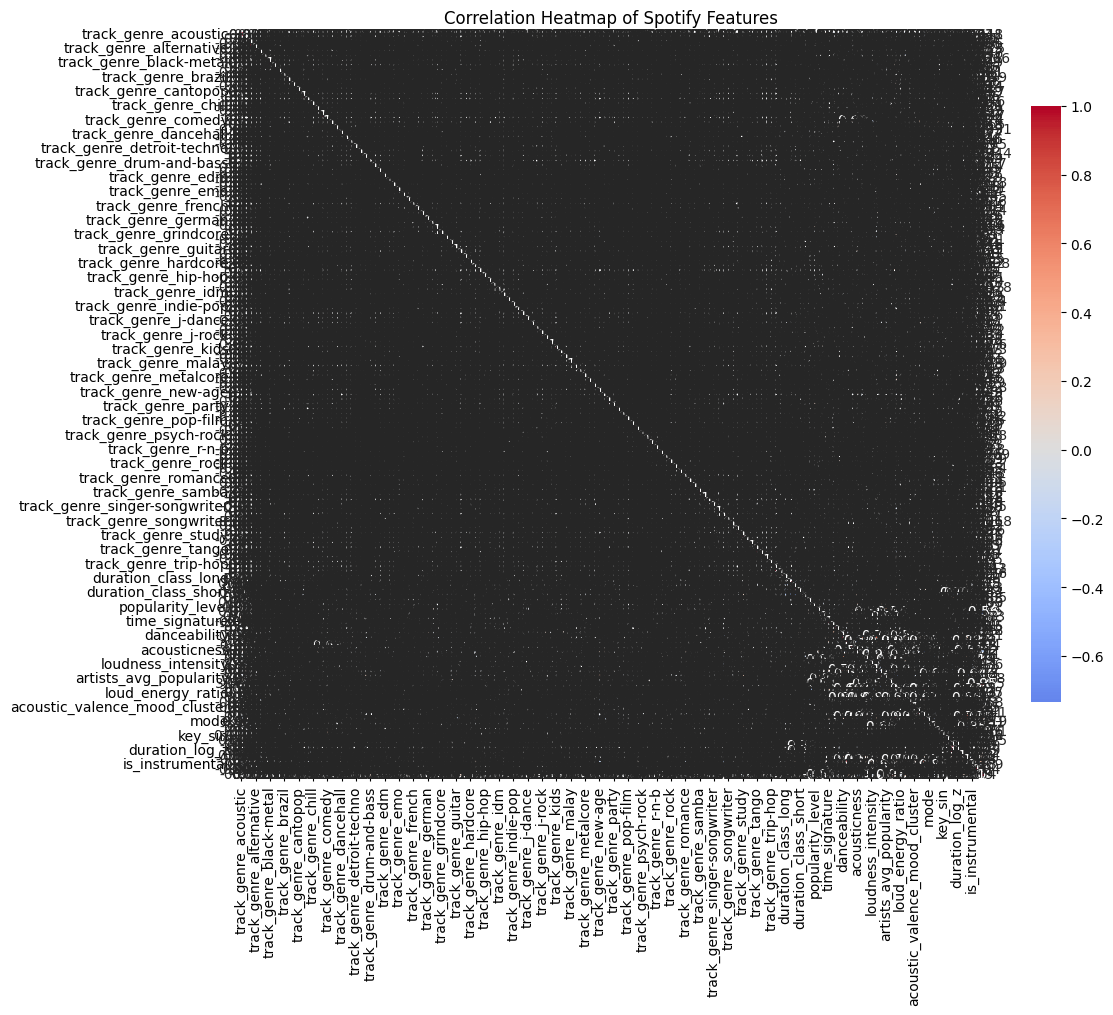

In [17]:
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Spotify Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
if 'target' in df.columns:
    target_column = 'target'
elif 'popularity' in df.columns:
    target_column = 'popularity'
else:
    # Use the last column as target
    target_column = df.columns[-1]

print(f"Target variable: {target_column}")

Target variable: popularity


In [19]:
X = df.drop(columns=[target_column])
y = df[target_column]


In [20]:
# Convert target to binary classification if it's continuous
if y.dtype in ['float64', 'int64'] and y.nunique() > 10:
    # Convert to binary classification (above/below median)
    y_binary = (y > y.median()).astype(int)
    print(f"Converted continuous target to binary classification")
    print(f"Class distribution: {y_binary.value_counts()}")
    y = y_binary

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Converted continuous target to binary classification
Class distribution: popularity
0    45148
1    44592
Name: count, dtype: int64
Training set size: (71792, 155)
Test set size: (17948, 155)


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [23]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [24]:
# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# Calculate additional metrics
svm_mse = mean_squared_error(y_test, y_pred_svm)
svm_mae = mean_absolute_error(y_test, y_pred_svm)
svm_rmse = np.sqrt(svm_mse)
svm_r2 = r2_score(y_test, y_pred_svm)

print(f"SVM MSE: {svm_mse:.4f}")
print(f"SVM MAE: {svm_mae:.4f}")
print(f"SVM RMSE: {svm_rmse:.4f}")
print(f"SVM R² Score: {svm_r2:.4f}")

SVM Accuracy: 0.9766
SVM MSE: 0.0234
SVM MAE: 0.0234
SVM RMSE: 0.1530
SVM R² Score: 0.9064


In [29]:
from sklearn.metrics import classification_report

print("--- SVM Model Classification Report ---")
print(classification_report(y_test, y_pred_svm))

--- SVM Model Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      9015
           1       0.98      0.97      0.98      8933

    accuracy                           0.98     17948
   macro avg       0.98      0.98      0.98     17948
weighted avg       0.98      0.98      0.98     17948



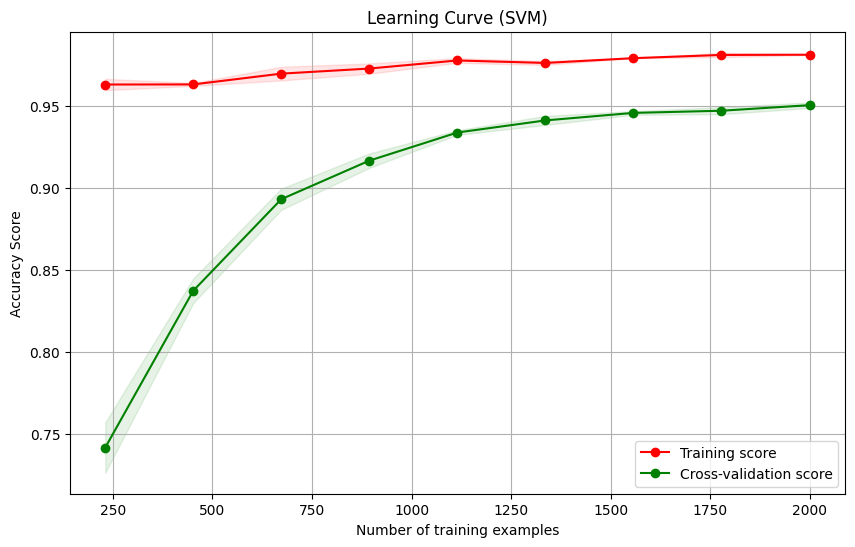

In [27]:
from sklearn.model_selection import learning_curve

# Define the training sizes to stop at 2000 samples
# Ensure train_sizes are positive integers
train_sizes = np.linspace(10, 2000, 10).astype(int) # Start from 10 to ensure positive values

# Calculate the learning curve using 5 popularity classes
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=train_sizes, scoring='accuracy')

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve (SVM)")
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()

# **Deep Learning**

---



Converted continuous target to binary classification for Deep Learning model
Class distribution: popularity
0    45148
1    44592
Name: count, dtype: int64
Epoch 1/100
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8753 - loss: 0.2745 - val_accuracy: 0.9719 - val_loss: 0.0871
Epoch 2/100
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9748 - loss: 0.0749 - val_accuracy: 0.9804 - val_loss: 0.0574
Epoch 3/100
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9860 - loss: 0.0419 - val_accuracy: 0.9961 - val_loss: 0.0211
Epoch 4/100
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9987 - loss: 0.0064 - val_accuracy: 0.9997 - val_loss: 0.0117
Epoch 5/100
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 6.4467e-04 - val_accuracy: 0.9999 - val_loss: 0.0118
Epoch 6/100
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 1.0000 - loss: 1.2859e-04 - val_accuracy: 0.9999 - val_loss: 0.0131
Epoch 7/100
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 7s 3

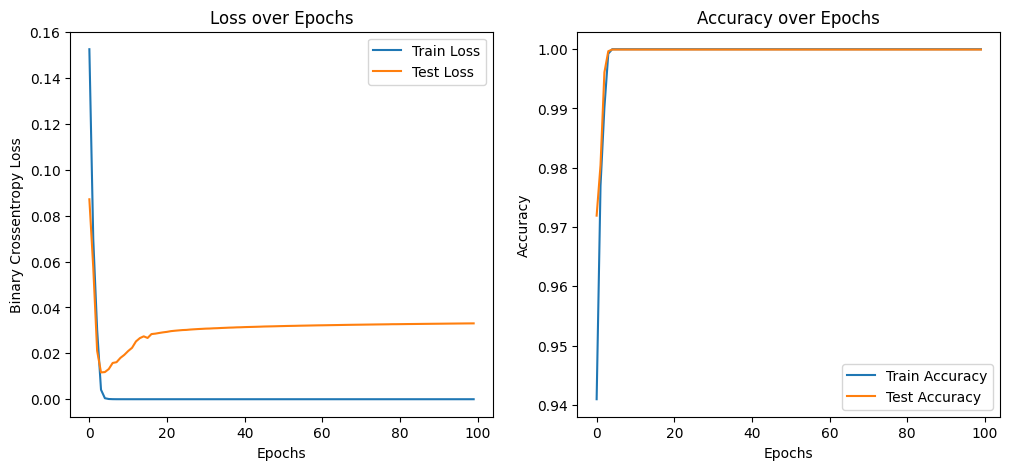

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error # Import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import SGD # Removed SGD import
from tensorflow.keras.optimizers import Adam # Imported Adam optimizer
import tensorflow as tf # Import tensorflow for tf.sqrt

# Use the existing DataFrame 'df' which has been loaded and preprocessed
# Assuming 'popularity_class' is the target column as identified previously
target_column = 'popularity'

X = df.drop(columns=[target_column])
y = df[target_column]

# Convert target to binary classification (above/below median) for classification
if y.dtype in ['float64', 'int64'] and y.nunique() > 2: # Check if it's continuous and has more than 2 unique values
    y_binary = (y > y.median()).astype(int)
    print(f"Converted continuous target to binary classification for Deep Learning model")
    print(f"Class distribution: {y_binary.value_counts()}")
    y = y_binary # Use the binary target for classification


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Add stratify for binary classification


# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model for binary classification
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid for binary classification


# Compile with Adam optimizer and binary crossentropy loss for binary classification
model.compile(optimizer=Adam(learning_rate=0.0005), # Use Adam with reduced learning rate
              loss='binary_crossentropy', # Use binary_crossentropy for binary classification
              metrics=['accuracy']) # Use accuracy metric


# Train
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=100,
                    verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nDeep Learning Model Test Loss: {loss:.4f}")
print(f"Deep Learning Model Test Accuracy: {accuracy:.4f}")


# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss') # Changed ylabel
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **KNN**

---



In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [41]:
X = df.drop(columns=['popularity'])
y = df['popularity']

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

In [44]:
# Calculate training accuracy
y_pred_train_knn = knn_model.predict(X_train_scaled)
knn_train_accuracy = accuracy_score(y_train, y_pred_train_knn)
print(f"KNN Training Accuracy: {knn_train_accuracy:.4f}")


knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Test Accuracy: {knn_accuracy:.4f}")

knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, y_pred_knn)

print(f"KNN MSE: {knn_mse:.4f}")
print(f"KNN MAE: {knn_mae:.4f}")
print(f"KNN RMSE: {knn_rmse:.4f}")
print(f"KNN R² Score: {knn_r2:.4f}")

KNN Training Accuracy: 0.9370
KNN Test Accuracy: 0.9065


In [45]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      9030
           1       0.92      0.89      0.90      8918

    accuracy                           0.91     17948
   macro avg       0.91      0.91      0.91     17948
weighted avg       0.91      0.91      0.91     17948



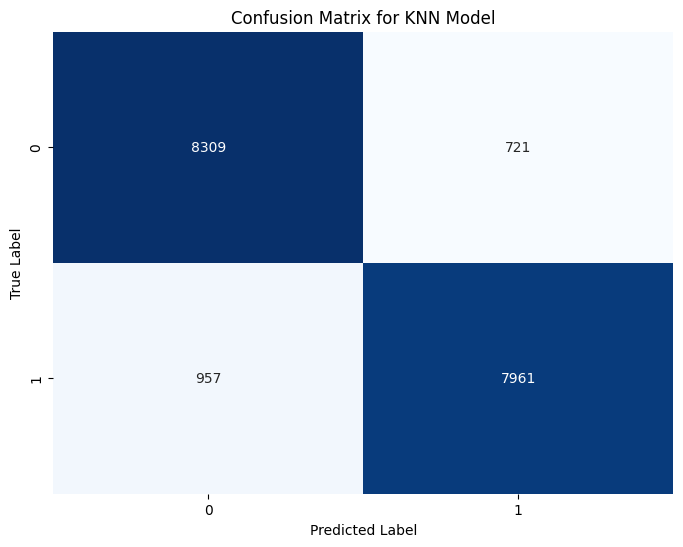

In [46]:
# Calculate and display the confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN Model')
plt.show()

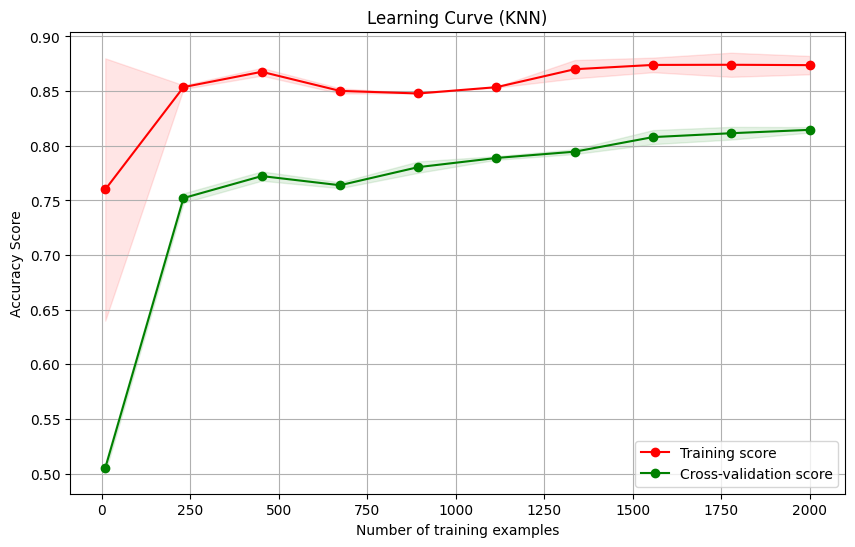

In [47]:
from sklearn.model_selection import learning_curve

# Define the training sizes to stop at 2000 samples
# Ensure train_sizes are positive integers
train_sizes_knn = np.linspace(10, 2000, 10).astype(int) # Start from 10 to ensure positive values

# Calculate the learning curve for KNN
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(
    knn_model, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=train_sizes_knn, scoring='accuracy')

# Calculate mean and standard deviation for training and test scores
train_scores_mean_knn = np.mean(train_scores_knn, axis=1)
train_scores_std_knn = np.std(train_scores_knn, axis=1)
test_scores_mean_knn = np.mean(test_scores_knn, axis=1)
test_scores_std_knn = np.std(test_scores_knn, axis=1)

# Plot the learning curve for KNN
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_knn, train_scores_mean_knn - train_scores_std_knn,
                 train_scores_mean_knn + train_scores_std_knn, alpha=0.1, color="r")
plt.fill_between(train_sizes_knn, test_scores_mean_knn - test_scores_std_knn,
                 test_scores_mean_knn + test_scores_std_knn, alpha=0.1, color="g")
plt.plot(train_sizes_knn, train_scores_mean_knn, 'o-', color="r", label="Training score")
plt.plot(train_sizes_knn, test_scores_mean_knn, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve (KNN)")
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()

## Model Performance Report

In [48]:
print("--- SVM Model Performance ---")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM MSE: {svm_mse:.4f}")
print(f"SVM MAE: {svm_mae:.4f}")
print(f"SVM RMSE: {svm_rmse:.4f}")
print(f"SVM R² Score: {svm_r2:.4f}")
print("\n--- Deep Learning Model Performance ---")
print(f"Deep Learning Model Test Loss: {loss:.4f}")
print(f"Deep Learning Model Test Accuracy: {accuracy:.4f}")
print("\n--- KNN Model Performance ---")
print(f"KNN Training Accuracy: {knn_train_accuracy:.4f}")
print(f"KNN Test Accuracy: {knn_accuracy:.4f}")
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

--- SVM Model Performance ---
SVM Accuracy: 0.9766
SVM MSE: 0.0234
SVM MAE: 0.0234
SVM RMSE: 0.1530
SVM R² Score: 0.9064

--- Deep Learning Model Performance ---
Deep Learning Model Test Loss: 0.0331
Deep Learning Model Test Accuracy: 0.9999

--- KNN Model Performance ---
KNN Training Accuracy: 0.9370
KNN Test Accuracy: 0.9065

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      9030
           1       0.92      0.89      0.90      8918

    accuracy                           0.91     17948
   macro avg       0.91      0.91      0.91     17948
weighted avg       0.91      0.91      0.91     17948



In [51]:
model.save('popularity_model.keras')
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
feature_names = list(X.columns)
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

In [52]:
!pip install streamlit plotly pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 130.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.3 MB/s eta 0:00:00


In [53]:
import streamlit as st
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Make sure you run your training code first, then add this:
print("Saving model and preprocessing components...")

# Save the trained Keras model
model.save('popularity_model.h5')
print("✅ Model saved as 'popularity_model.h5'")

# Save the StandardScaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✅ Scaler saved as 'scaler.pkl'")

# Save feature names (column names from your training data)
feature_names = list(X.columns)
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)
print("✅ Feature names saved as 'feature_names.pkl'")

print(f"\n📊 Your model uses these {len(feature_names)} features:")
for i, feature in enumerate(feature_names, 1):
    print(f"{i:2d}. {feature}")

Saving model and preprocessing components...
✅ Model saved as 'popularity_model.h5'
✅ Scaler saved as 'scaler.pkl'
✅ Feature names saved as 'feature_names.pkl'

📊 Your model uses these 155 features:
 1. track_genre_acoustic
 2. track_genre_afrobeat
 3. track_genre_alt-rock
 4. track_genre_alternative
 5. track_genre_ambient
 6. track_genre_anime
 7. track_genre_black-metal
 8. track_genre_bluegrass
 9. track_genre_blues
10. track_genre_brazil
11. track_genre_breakbeat
12. track_genre_british
13. track_genre_cantopop
14. track_genre_chicago-house
15. track_genre_children
16. track_genre_chill
17. track_genre_classical
18. track_genre_club
19. track_genre_comedy
20. track_genre_country
21. track_genre_dance
22. track_genre_dancehall
23. track_genre_death-metal
24. track_genre_deep-house
25. track_genre_detroit-techno
26. track_genre_disco
27. track_genre_disney
28. track_genre_drum-and-bass
29. track_genre_dub
30. track_genre_dubstep
31. track_genre_edm
32. track_genre_electro
33. track_

In [55]:
streamlit_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Page config
st.set_page_config(
    page_title="🎵 Music Popularity Predictor",
    page_icon="🎵",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS for styling
st.markdown("""
<style>
    .main-header {
        background: linear-gradient(90deg, #667eea 0%, #764ba2 100%);
        padding: 2rem;
        border-radius: 10px;
        color: white;
        text-align: center;
        margin-bottom: 2rem;
    }

    .prediction-card {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        padding: 2rem;
        border-radius: 15px;
        color: white;
        text-align: center;
        box-shadow: 0 10px 30px rgba(0,0,0,0.2);
    }

    .high-popularity {
        background: linear-gradient(135deg, #4CAF50 0%, #45a049 100%);
    }

    .low-popularity {
        background: linear-gradient(135deg, #f44336 0%, #da190b 100%);
    }

    .metric-card {
        background: white;
        padding: 1rem;
        border-radius: 10px;
        border-left: 5px solid #667eea;
        box-shadow: 0 2px 10px rgba(0,0,0,0.1);
    }
</style>
""", unsafe_allow_html=True)

# Cache model loading
@st.cache_resource
def load_model_and_scaler():
    """Load the trained model and scaler"""
    try:
        model = tf.keras.models.load_model('popularity_model.h5')

        with open('scaler.pkl', 'rb') as f:
            scaler = pickle.load(f)

        with open('feature_names.pkl', 'rb') as f:
            feature_names = pickle.load(f)

        return model, scaler, feature_names, True
    except Exception as e:
        st.error(f"Error loading model: {e}")
        return None, None, None, False

# Load model
model, scaler, feature_names, model_loaded = load_model_and_scaler()

def main():
    # Header
    st.markdown("""
    <div class="main-header">
        <h1>🎵 Music Popularity Predictor</h1>
        <p>Predict whether your song will be a hit using advanced AI</p>
        <p>🚀 Running on Google Colab!</p>
    </div>
    """, unsafe_allow_html=True)

    if not model_loaded:
        st.error("⚠️ Model not loaded. Please ensure model files are present.")
        return

    # Sidebar
    st.sidebar.title("🎛️ Control Panel")
    st.sidebar.success("✅ Model Loaded Successfully")
    st.sidebar.info(f"📊 Features: {len(feature_names)}")

    # Input method selection
    input_method = st.sidebar.selectbox(
        "Choose Input Method",
        ["🎚️ Manual Input", "📁 Upload CSV", "🎲 Random Sample"]
    )

    if input_method == "🎚️ Manual Input":
        manual_input_interface()
    elif input_method == "📁 Upload CSV":
        csv_upload_interface()
    else:
        random_sample_interface()

def manual_input_interface():
    """Manual input interface with sliders"""
    st.subheader("🎚️ Adjust Song Features")

    # Create columns for better layout
    col1, col2 = st.columns(2)

    input_data = {}

    # Split features into two columns
    mid_point = len(feature_names) // 2

    with col1:
        st.markdown("### 🎵 Audio Features (Part 1)")
        for feature in feature_names[:mid_point]:
            input_data[feature] = st.slider(
                f"{feature.replace('_', ' ').title()}",
                min_value=-3.0,
                max_value=3.0,
                value=0.0,
                step=0.1,
                help=f"Adjust {feature} value"
            )

    with col2:
        st.markdown("### 🎼 Audio Features (Part 2)")
        for feature in feature_names[mid_point:]:
            input_data[feature] = st.slider(
                f"{feature.replace('_', ' ').title()}",
                min_value=-3.0,
                max_value=3.0,
                value=0.0,
                step=0.1,
                help=f"Adjust {feature} value"
            )

    # Prediction button
    if st.button("🔮 Predict Popularity", type="primary"):
        make_prediction(input_data)

    # Feature visualization
    if st.checkbox("📊 Show Feature Chart"):
        create_feature_chart(input_data)

def csv_upload_interface():
    """CSV upload interface"""
    st.subheader("📁 Upload CSV File")

    uploaded_file = st.file_uploader(
        "Choose a CSV file",
        type="csv",
        help="Upload a CSV file with song features"
    )

    if uploaded_file is not None:
        try:
            df = pd.read_csv(uploaded_file)
            st.success(f"✅ Loaded {len(df)} songs from CSV")

            # Show preview
            st.subheader("📋 Data Preview")
            st.dataframe(df.head())

            # Batch prediction
            if st.button("🔮 Predict All Songs", type="primary"):
                predictions = batch_predict(df)
                if predictions is not None:
                    display_batch_results(predictions, df)

        except Exception as e:
            st.error(f"Error reading CSV: {e}")

def random_sample_interface():
    """Random sample interface"""
    st.subheader("🎲 Generate Random Sample")

    if st.button("🎲 Generate Random Song", type="primary"):
        random_data = {}
        for feature in feature_names:
            random_data[feature] = np.random.normal(0, 1)

        st.subheader("🎵 Generated Song Features")
        df_display = pd.DataFrame(list(random_data.items()), columns=['Feature', 'Value'])
        df_display['Feature'] = df_display['Feature'].str.replace('_', ' ').str.title()
        df_display['Value'] = df_display['Value'].round(3)
        st.dataframe(df_display, use_container_width=True)

        make_prediction(random_data)

def make_prediction(input_data):
    """Make prediction and display results"""
    try:
        # Prepare data
        input_df = pd.DataFrame([input_data], columns=feature_names)
        input_df = input_df.fillna(0)

        # Scale data
        input_scaled = scaler.transform(input_df)

        # Make prediction
        prediction_prob = model.predict(input_scaled, verbose=0)[0][0]
        prediction_class = 1 if prediction_prob > 0.5 else 0
        confidence = max(prediction_prob, 1 - prediction_prob)

        # Display results
        display_prediction_results(prediction_prob, prediction_class, confidence)

    except Exception as e:
        st.error(f"Prediction error: {e}")

def display_prediction_results(prob, pred_class, confidence):
    """Display prediction results with fancy styling"""
    col1, col2, col3 = st.columns(3)

    with col1:
        st.metric(
            "🎯 Prediction",
            "High Popularity" if pred_class == 1 else "Low Popularity",
            delta=f"{confidence*100:.1f}% confidence"
        )

    with col2:
        st.metric(
            "📊 Probability",
            f"{prob*100:.1f}%",
            delta=f"{'↑' if prob > 0.5 else '↓'} {abs(prob-0.5)*200:.1f}%"
        )

    with col3:
        st.metric(
            "🎖️ Confidence",
            f"{confidence*100:.1f}%",
            delta="High" if confidence > 0.8 else "Medium" if confidence > 0.6 else "Low"
        )

    # Prediction card
    card_class = "high-popularity" if pred_class == 1 else "low-popularity"
    emoji = "🔥" if pred_class == 1 else "📉"

    st.markdown(f"""
    <div class="prediction-card {card_class}">
        <h2>{emoji} {'HIGH POPULARITY' if pred_class == 1 else 'LOW POPULARITY'}</h2>
        <h3>Probability: {prob*100:.1f}%</h3>
        <p>Confidence Level: {confidence*100:.1f}%</p>
    </div>
    """, unsafe_allow_html=True)

    # Probability gauge
    fig_gauge = go.Figure(go.Indicator(
        mode = "gauge+number+delta",
        value = prob * 100,
        domain = {'x': [0, 1], 'y': [0, 1]},
        title = {'text': "Popularity Score"},
        delta = {'reference': 50},
        gauge = {
            'axis': {'range': [None, 100]},
            'bar': {'color': "darkblue"},
            'steps': [
                {'range': [0, 50], 'color': "lightgray"},
                {'range': [50, 100], 'color': "gray"}
            ],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': 90
            }
        }
    ))
    fig_gauge.update_layout(height=400)
    st.plotly_chart(fig_gauge, use_container_width=True)

def create_feature_chart(input_data):
    """Create bar chart for features"""
    fig = px.bar(
        x=list(input_data.values()),
        y=list(input_data.keys()),
        orientation='h',
        title="Song Feature Values",
        color=list(input_data.values()),
        color_continuous_scale='viridis'
    )
    fig.update_layout(height=600)
    st.plotly_chart(fig, use_container_width=True)

def batch_predict(df):
    """Make predictions for batch of songs"""
    try:
        # Prepare data
        df_processed = df.copy()

        # Add missing columns with default values
        for feature in feature_names:
            if feature not in df_processed.columns:
                df_processed[feature] = 0

        # Reorder columns to match training
        df_processed = df_processed[feature_names]
        df_processed = df_processed.fillna(0)

        # Scale data
        scaled_data = scaler.transform(df_processed)

        # Make predictions
        predictions = model.predict(scaled_data, verbose=0)

        return predictions.flatten()

    except Exception as e:
        st.error(f"Batch prediction error: {e}")
        return None

def display_batch_results(predictions, original_df):
    """Display batch prediction results"""
    # Create results dataframe
    results_df = original_df.copy()
    results_df['Popularity_Probability'] = predictions
    results_df['Predicted_Class'] = (predictions > 0.5).astype(int)
    results_df['Prediction_Label'] = results_df['Predicted_Class'].map({
        1: 'High Popularity', 0: 'Low Popularity'
    })

    st.subheader("🎯 Batch Prediction Results")

    # Summary metrics
    col1, col2, col3 = st.columns(3)

    with col1:
        high_pop_count = (predictions > 0.5).sum()
        st.metric("🔥 High Popularity Songs", high_pop_count)

    with col2:
        avg_prob = predictions.mean()
        st.metric("📊 Average Probability", f"{avg_prob*100:.1f}%")

    with col3:
        max_prob = predictions.max()
        st.metric("⭐ Highest Score", f"{max_prob*100:.1f}%")

    # Results table
    st.dataframe(
        results_df[['Popularity_Probability', 'Predicted_Class', 'Prediction_Label']],
        use_container_width=True
    )

    # Distribution chart
    fig = px.histogram(
        x=predictions,
        nbins=20,
        title="Popularity Score Distribution",
        labels={'x': 'Popularity Probability', 'y': 'Count'}
    )
    st.plotly_chart(fig, use_container_width=True)

if __name__ == "__main__":
    main()
'''

# Write the Streamlit app to a file
with open('streamlit_app.py', 'w') as f:
    f.write(streamlit_code)

print("✅ Streamlit app file created: streamlit_app.py")

✅ Streamlit app file created: streamlit_app.py


In [ ]:
# FINAL STEP: Run Streamlit in Google Colab
# Run this cell to start your Streamlit app

import subprocess
import threading
import time
from pyngrok import ngrok
import requests
import os # Import os

# Get ngrok authtoken from Colab secrets
# Make sure you have added your NGROK_AUTH_TOKEN to Colab secrets
from google.colab import userdata
NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')
if NGROK_AUTH_TOKEN:
    ngrok.set_auth_token(NGROK_AUTH_TOKEN)
    print("✅ ngrok authtoken set.")
else:
    print("⚠️ NGROK_AUTH_TOKEN not found in Colab secrets. Please add it to run ngrok.")


def run_streamlit():
    """Run Streamlit app"""
    subprocess.run(["streamlit", "run", "streamlit_app.py", "--server.port", "8501", "--server.headless", "true"])

def setup_ngrok():
    """Setup ngrok tunnel"""
    try:
        # Kill any existing ngrok processes
        ngrok.kill()

        # Create tunnel
        public_url = ngrok.connect(8501)
        print(f"🚀 Your Streamlit app is live at: {public_url}")
        print(f"🔗 Click the link above to access your Music Popularity Predictor!")

        return public_url
    except Exception as e:
        print(f"Error setting up ngrok: {e}")
        return None

# Start Streamlit in background thread
print("🎵 Starting Music Popularity Predictor...")
print("⏳ Please wait while the app loads...")

streamlit_thread = threading.Thread(target=run_streamlit)
streamlit_thread.daemon = True
streamlit_thread.start()

# Wait for Streamlit to start
time.sleep(10)

# Setup ngrok tunnel
public_url = setup_ngrok()

if public_url:
    print("\n" + "="*50)
    print("🎉 SUCCESS! Your app is ready!")
    print("="*50)
    print(f"🌐 Public URL: {public_url}")
    print("\n📱 Features available:")
    print("   • 🎚️ Manual input with sliders")
    print("   • 📁 CSV upload for batch predictions")
    print("   • 🎲 Random song generator")
    print("   • 📊 Interactive visualizations")
    print("   • 🔮 Real-time predictions")
    print("\n⚠️  Keep this Colab session running to maintain the app!")
    print("💡 The app will stop if you close this notebook.")
else:
    print("❌ Failed to create public URL. Try running the cell again.")

# Keep the cell running
try:
    while True:
        time.sleep(1)
except KeyboardInterrupt:
    print("\n🛑 Stopping the app...")
    ngrok.kill()

✅ ngrok authtoken set.
🎵 Starting Music Popularity Predictor...
⏳ Please wait while the app loads...
🚀 Your Streamlit app is live at: NgrokTunnel: "https://8793ad74fe16.ngrok-free.app" -> "http://localhost:8501"
🔗 Click the link above to access your Music Popularity Predictor!

🎉 SUCCESS! Your app is ready!
🌐 Public URL: NgrokTunnel: "https://8793ad74fe16.ngrok-free.app" -> "http://localhost:8501"

📱 Features available:
   • 🎚️ Manual input with sliders
   • 📁 CSV upload for batch predictions
   • 🎲 Random song generator
   • 📊 Interactive visualizations
   • 🔮 Real-time predictions

⚠️  Keep this Colab session running to maintain the app!
💡 The app will stop if you close this notebook.
